### Hard Voting Classifier
- Combines conceptually different classifiers
- Uses a majority to predict class labels.

In [15]:
# example majority rule (hard vote)
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import VotingClassifier as VC

iris = datasets.load_iris(); X, y = iris.data[:, 1:3], iris.target

clf1 = LR(random_state=1)
clf2 = RFC(n_estimators=50, random_state=1)
clf3 = GNB()

eclf = VC(estimators=[('lr', clf1), 
                      ('rf', clf2), 
                      ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


### Soft Voting Classifier
- Returns class label as argmax(sum of predictions)
- `weights` assigns weights to each classifier - class probabilities are multiplied by their respective weights. Final class label is derived from the weighted average.

In [16]:
# example weighted averages (soft vote)
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier as VC

# Loading some example data
iris = datasets.load_iris(); X = iris.data[:,[0,2]]; y = iris.target

# Training classifiers
clf1 = DTC(max_depth=4)
clf2 = KNC(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VC( estimators=[('dt', clf1), 
                       ('knn', clf2), 
                       ('svc', clf3)],
                       voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

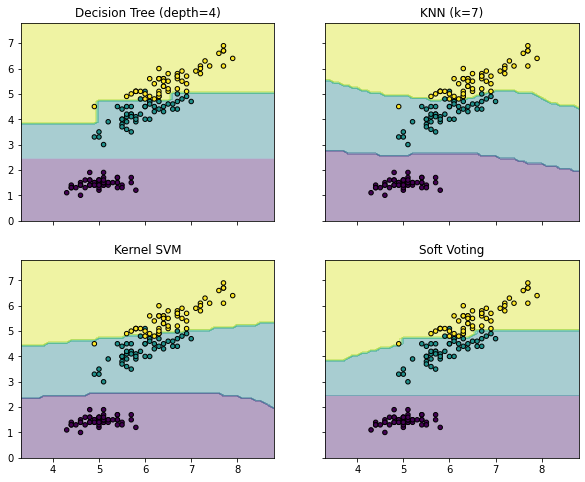

In [17]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### [Voting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor)

In [18]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import VotingRegressor as VR

In [19]:
X, y = load_diabetes(return_X_y=True)

reg1 = GBR(random_state=1)
reg2 = RFR(random_state=1)
reg3 = LR()

reg1.fit(X,y); reg2.fit(X,y); reg3.fit(X,y)

ereg = VR([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X,y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [20]:
# make 20 first predictions
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

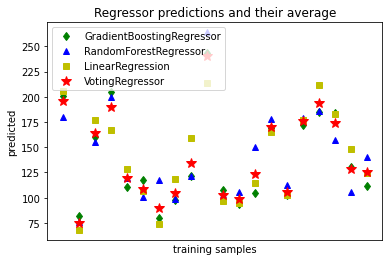

In [21]:
# red stars = average prediction according to Voting Regressor
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()